# Jigsaw Unintended bias in Toxicity Classification

## 1. Business Problem 

### Problem Description
- Social networking sites are the source of most of the recent trend. Almost every human is one way or another attached and affected by these sites. Leading platforms gives people freedom to express themselves through posting of comments and various media. Although that is good in an idea world, where no one is expected to abuse, such freedom but in real world often exactly opposite is observed. Such abuse of freedom often leads to hate spreading, racial slurring or verbal assault. These dangers refrain many people from sharing their opinion or sharing any media for that matter which is harmful for leading platform as well as our society.   

- The Conversation AI team, a research initiative founded by Jigsaw and Google (both part of Alphabet), builds technology to protect voices in conversation. Their idea was to build an application that could detect and remove or limit verbal abuse which crosses the ‘terms of use’ of a particular site. Conversational AI uses machine learning, which provides a distinct advantage over other technical solutions, and detect comments that contain toxic content. Our solution makes use of  machine learning,natural language processing tools for preprocessing the data and deep learning approaches were used to train a model that could detect the toxicity of the comments. 


### Problem Statement

The model which was built by The Conversation AI team has the problem of unintended bias and this has to be removed (or minimized) because of this the comments which are not actually toxic will be predicted as toxic.

## 1.2 Source / useful links 
- https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification

- https://www.kaggle.com/gpreda/jigsaw-eda
- https://www.kaggle.com/kabure/simple-eda-hard-views-w-easy-code
- https://www.kaggle.com/ekhtiar/unintended-eda-with-tutorial-notes
- https://www.kaggle.com/dborkan/benchmark-kernel
- https://www.kaggle.com/thousandvoices/simple-lstm/log

## 1.3 Real World / Business Objectives and Constraints 

- Predicting whether a comment is toxic or not with a probability score.
- Minimize unintended bias.
- No strict latency requirements.

## 2. Machine Learning problem 

### 2.1 Data 

### 2.1.1 Data Overview 
- All of the data is in 2 files: Train and Test.</br>

- Train.csv contains 45 columns:  ['id' 'target' 'comment_text' 'severe_toxicity' 'obscene'
 'identity_attack' 'insult' 'threat' 'asian' 'atheist' 'bisexual' 'black'
 'buddhist' 'christian' 'female' 'heterosexual' 'hindu'
 'homosexual_gay_or_lesbian' 'intellectual_or_learning_disability'
 'jewish' 'latino' 'male' 'muslim' 'other_disability' 'other_gender'
 'other_race_or_ethnicity' 'other_religion' 'other_sexual_orientation'
 'physical_disability' 'psychiatric_or_mental_illness' 'transgender'
 'white' 'created_date' 'publication_id' 'parent_id' 'article_id' 'rating'
 'funny' 'wow' 'sad' 'likes' 'disagree' 'sexual_explicit'
 'identity_annotator_count' 'toxicity_annotator_count']

- Test.csv contains id,comment_text
- Size of Train.csv - 778.4MB
- Size of Test.csv - 28.54MB
- Number of rows in Train.csv = 1804874
- Number of rows in Test.csv = 97320

### Data Field Explaination
The comments are stored in train and test in comment_text column.
Additionally, in train we have flags for the presence in the comments of a certain sensitive topic. The topic is related to five categories: race or ethnicity, gender, sexual orientation, religion, disability, as following:

- race or ethnicity: asian, black, jewish, latino, other_race_or_ethnicity, white
- gender: female, male, transgender, other_gender
- sexual orientation: bisexual, heterosexual, homosexual_gay_or_lesbian, other_sexual_orientation
- religion: atheist,buddhist, christian, hindu, muslim, other_religion
- disability: intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness

We also have few article/comment identification information:
created_date
publication_id
parent_id
article_id

Several user feedback information associated with the comments are provided:

- rating
- funny
- wow
- sad
- likes
- disagree
- sexual_explicit

In this dataset there are  two  fields related to annotations:
- identity_annotator_count
- toxicity_annotator_count


## 2.1.2 Example Data point 

comment_text='This is so cool.'</br>
target=0.0

## 2.2 Mapping the real-world problem to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem 
The task is classification and we need to give probabilies w.r.t. toxic level. 

### 2.2.2 Performance metric 
This competition uses a newly developed metric that combines several submetrics to balance overall performance with various aspects of unintended bias.</br>
**Overall AUC**</br>
This is the ROC-AUC for the full evaluation set.

**Bias AUCs**</br>
To measure unintended bias, we again calculate the ROC-AUC, this time on three specific subsets of the test set for each identity, each capturing a different aspect of unintended bias. 


**a. Subgroup AUC** — This calculates AUC on only the examples from the subgroup. It represents model understanding and performance within the group itself.
A low value in this metric means the model does a poor job of distinguishing between toxic and non-toxic comments that mention the identity.

**b. BNSP AUC** — This calculates AUC on the positive examples from the background and the negative examples from the subgroup.
A low value here means that the model confuses toxic examples that mention the identity with non-toxic examples that do not.


**c. BPSN AUC** — This calculates AUC on the negative examples from the background and the positive examples from the subgroup.
A low value in this metric means that the model confuses non-toxic examples that mention the identity with toxic examples that do not.

**d. Final Metrics** — We combine the overall AUC with the generalized mean of the Bias AUCs to calculate the final model score:

score=w0AUCoverall+∑a=1AwaMp(ms,a)
where:

A = number of submetrics (3)

ms,a = bias metric for identity subgroups using submetric a

wa = a weighting for the relative importance of each submetric; all four w values set to 0.25


## 3. Exploratory Data Analysis 
### 3.1 Data Loading  

In [0]:
!pip install emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from wordcloud import WordCloud
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report,log_loss
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
import re
from gensim.models import KeyedVectors 
from wordcloud import WordCloud
from scipy.sparse import hstack
from sklearn.manifold import TSNE 
from sklearn.preprocessing import Normalizer 
import plotly.offline as py
import plotly
from plotly.offline import *
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.naive_bayes import MultinomialNB
import emoji
from tqdm.notebook import tqdm
tqdm.pandas()

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.preprocessing import text, sequence
from gensim.models import KeyedVectors
from tensorflow.keras.utils import plot_model 
!pip install pyLDAvis
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import nltk
nltk.download('wordnet')
from gensim.models import LdaModel
import tensorflow as tf
from textblob import TextBlob, Word, Blobber
from sklearn.preprocessing import StandardScaler

!pip show tensorflow
!pip install plot_model
!pip install tensorboardcolab
%load_ext tensorboard
!rm -rf ./logs/ 
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 51kB 1.2MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=c4b5063117a76bbbd6dccd1fe281d1b1b78aa51da0655bc965c489a49feb9f3e
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 14.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7db75b3388d35c1832f348d863b522f613c20860e38933419afbc6f1ccb803e6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8d842ad19f7ff6bba106ad4b5232d4b7395e3fa64819d8ad8bb7bbf332848e18
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Loading the train data into pandas dataframe
train = pd.read_csv('/content/drive/My Drive/train.csv')
# Loading the test data into pandas dataframe
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
# We have 1.8 millions of data record in train dataset with 45 features given
print("Number of data points in train data", train.shape)
print('-'*50) 
print("The attributes of train data :", train.columns.values)

Number of data points in train data (1804874, 45)
--------------------------------------------------
The attributes of train data : ['id' 'target' 'comment_text' 'severe_toxicity' 'obscene'
 'identity_attack' 'insult' 'threat' 'asian' 'atheist' 'bisexual' 'black'
 'buddhist' 'christian' 'female' 'heterosexual' 'hindu'
 'homosexual_gay_or_lesbian' 'intellectual_or_learning_disability'
 'jewish' 'latino' 'male' 'muslim' 'other_disability' 'other_gender'
 'other_race_or_ethnicity' 'other_religion' 'other_sexual_orientation'
 'physical_disability' 'psychiatric_or_mental_illness' 'transgender'
 'white' 'created_date' 'publication_id' 'parent_id' 'article_id' 'rating'
 'funny' 'wow' 'sad' 'likes' 'disagree' 'sexual_explicit'
 'identity_annotator_count' 'toxicity_annotator_count']


In [0]:
print("Sample train datapoint :")
train.head(1)

Sample train datapoint :


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4


In [0]:
# We have 97k of data record in test dataset 
print("Number of data points in test data", test.shape)
print(test.columns.values) 
test.head(1)

Number of data points in test data (97320, 2)
['id' 'comment_text']


,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...


# Exploratory Data Analysis
##Percentage of NaN values

In [0]:
# its always a good idea to count the amount of missing values before diving into any analysis
# Lets also see how many missing values (in percentage) we are dealing with
miss_val_train_df = train.isnull().sum(axis=0) / len(train)
miss_val_train_df = miss_val_train_df[miss_val_train_df > 0] * 100
miss_val_train_df

asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino                                 77.553558
male                                   77.553558
muslim                                 77.553558
other_disability                       77.553558
other_gender                           77.553558
other_race_or_ethnicity                77.553558
other_religion                         77.553558
other_sexual_orientation               77.553558
physical_disability 

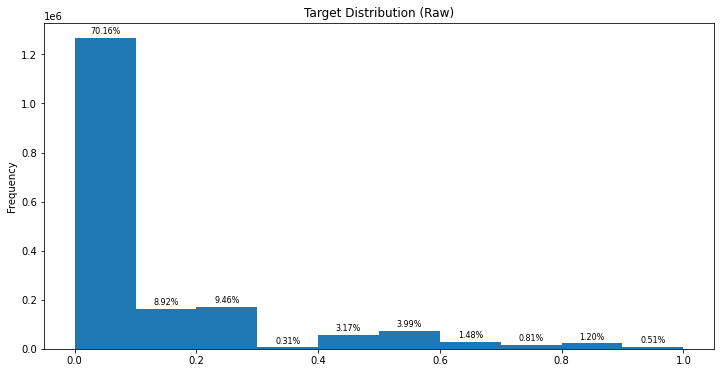

In [0]:
plt.figure(figsize=(12,6))
plot = train.target.plot(kind='hist',bins=10)

ax = plot.axes

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100 / train.shape[0]:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=8, 
                color='black',
                xytext=(0,7), 
                textcoords='offset points')
plt.title('Target Distribution (Raw)')
plt.show()


- **There are 70% non-toxic data points which are in the range of 0.0 to 0.1 and  from above plot we can see that more than 90% data points are non-toxic.**
- **We have to note that values which are less than 0.5 are non- toxic and greater than 0.5 are toxic**

# Lets assign binary values to target variable

In [0]:
def assign_class(target):
  '''this is for assigning class labels'''
    if target >= .5:
        return 1
    else: 
        return 0

# we will create binary class column which will be our Y label
train['class'] = train.apply(lambda x: assign_class(x['target']), axis= 1)

Number of Non-Toxic comments  1660540 ( 92.00309827722046 % )
Number of Toxic comments  144334 ( 7.99690172277954 % )


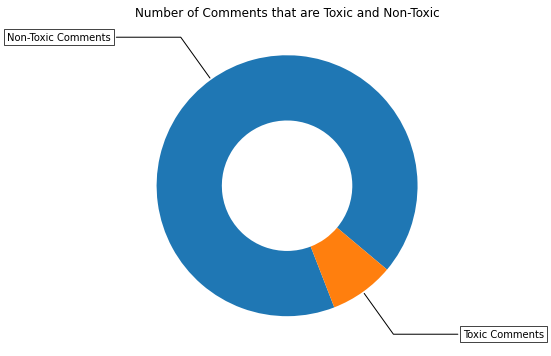

In [0]:
class_specific_count = train['class'].value_counts()
print("Number of Non-Toxic comments ", class_specific_count[0],"(",((class_specific_count[0]/len(train))*100),"% )")
print("Number of Toxic comments ",class_specific_count[1], "(",((class_specific_count[1]/len(train))*100),"% )")
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Non-Toxic Comments", "Toxic Comments"]       
data = [class_specific_count[0], class_specific_count[1]]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72) 
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
  ang = (p.theta2 - p.theta1)/2. + p.theta1    
  y = np.sin(np.deg2rad(ang))    
  x = np.cos(np.deg2rad(ang))    
  horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]   
  connectionstyle = "angle,angleA=0,angleB={}".format(ang)   
  kw["arrowprops"].update({"connectionstyle": connectionstyle})    
  ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)
ax.set_title("Number of Comments that are Toxic and Non-Toxic")
plt.show()

**Observation: we see that there are only 7% toxic data and 92% data is non-Toxic.Its clear that our data is imbalanced.**

# Lets defining some categories of comments

In [0]:
#https://www.kaggle.com/kabure/simple-eda-hard-views-w-easy-code
etnics = ['asian' , 'latino' , 'black', 'white', 'other_race_or_ethnicity']

religions = ['atheist', 'buddhist', 'hindu', 'jewish', 'muslim', 'christian', 'other_religion']

sexual = ['female', 'male', 'other_gender'] 

sexual_orientation = ['heterosexual', 'bisexual', 'transgender', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']

disabilities = ['intellectual_or_learning_disability', 'physical_disability', 'psychiatric_or_mental_illness', 'other_disability']

reactions = ['funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit']

In [0]:
def bar_plot(features,title,xlabell):
  '''this function seperates toxic and non-toxic data and plots bar plot'''
  train_labeled_df = train.loc[:, ['target'] + features].dropna()
  toxic_df = train_labeled_df[train_labeled_df['target'] >= .5][features]
  non_toxic_df = train_labeled_df[train_labeled_df['target'] < .5][features]

  # at first, we just want to consider the identity tags in binary format. So if the tag is any value other than 0 we consider it as 1.
  toxic_count1 = toxic_df[features].where(train_labeled_df == 0, other = 1).sum()
  non_toxic_count1= non_toxic_df[features].where(train_labeled_df == 0, other = 1).sum()

  # now we can concat the two series together to get a toxic count vs non toxic count for each identity
  toxic_vs_non_toxic = pd.concat([toxic_count1, non_toxic_count1], axis=1)
  toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index=str, columns={1: "non-toxic", 0: "toxic"})
  # here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
  toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=False, figsize=(25,8), fontsize=20).legend(prop={'size': 20})
  plt.title(title, fontsize=26)
  plt.ylabel('Counts', fontsize=26)
  plt.xlabel(xlabell, fontsize=26)
  plt.xticks(rotation=0)

#### Let's represent similarly the distribution of additional toxicity features.

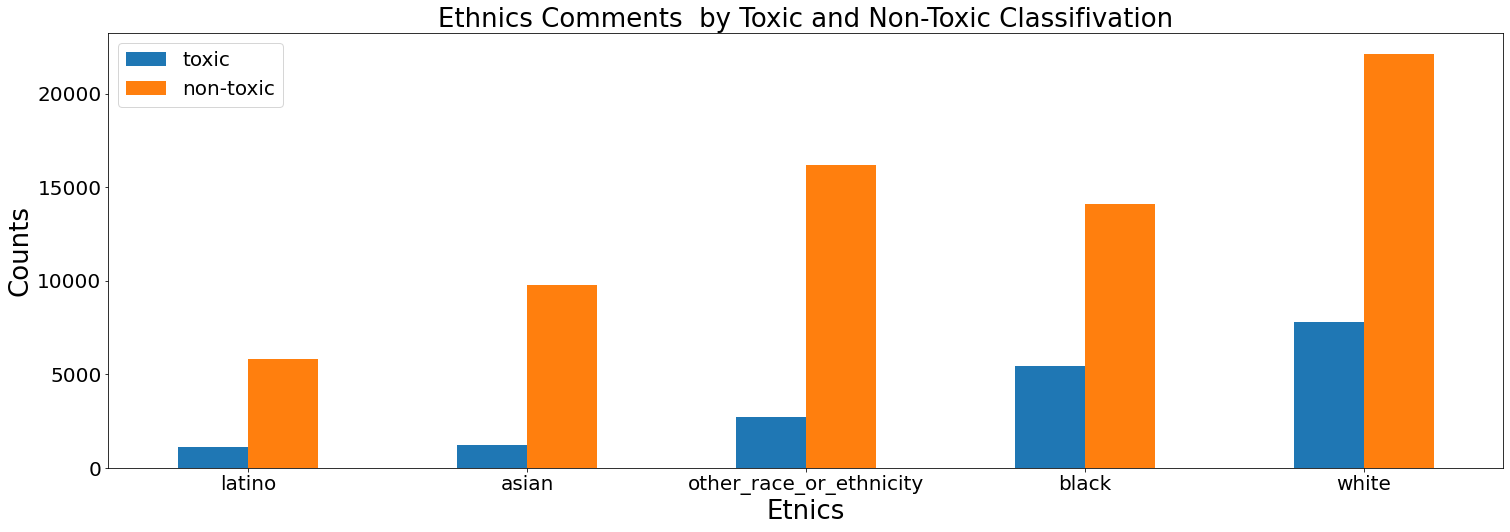

In [0]:
bar_plot(etnics,"Ethnics Comments  by Toxic and Non-Toxic Classifivation",'Etnics')

**From Etnics category white feature contains more toxic comments followed by black feature and other_race_or_ethnicity fetures**

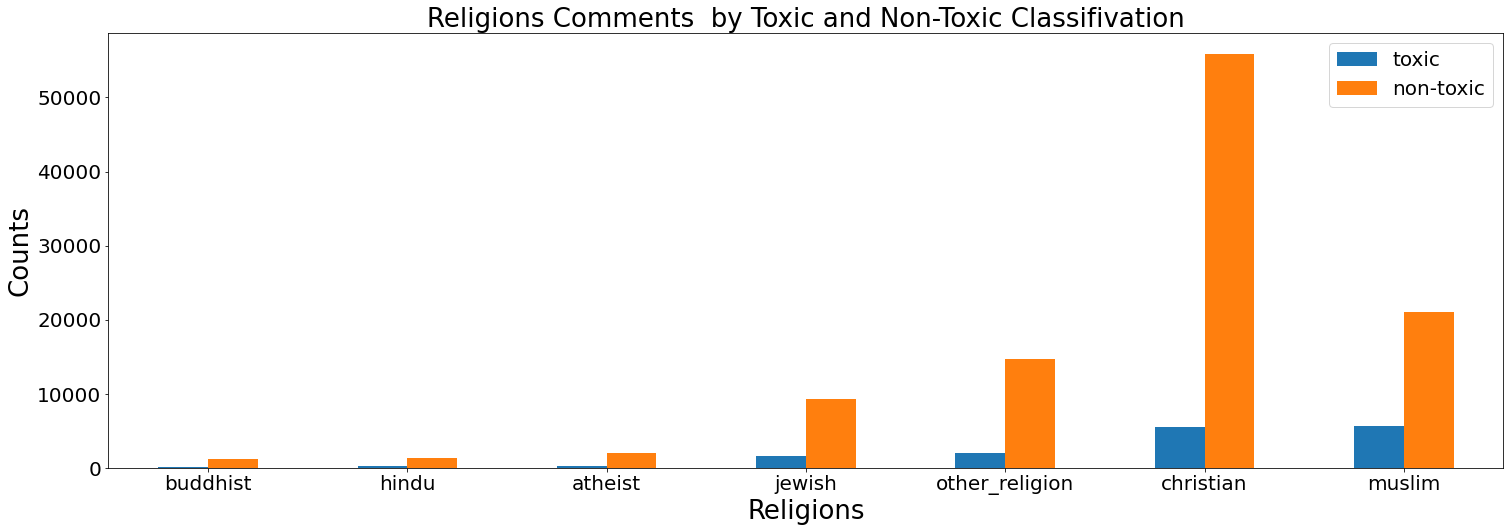

In [0]:
bar_plot(religions,"Religions Comments  by Toxic and Non-Toxic Classifivation",'Religions')

**From Religions category muslim feature contains more toxic comments followed by cristian feature**

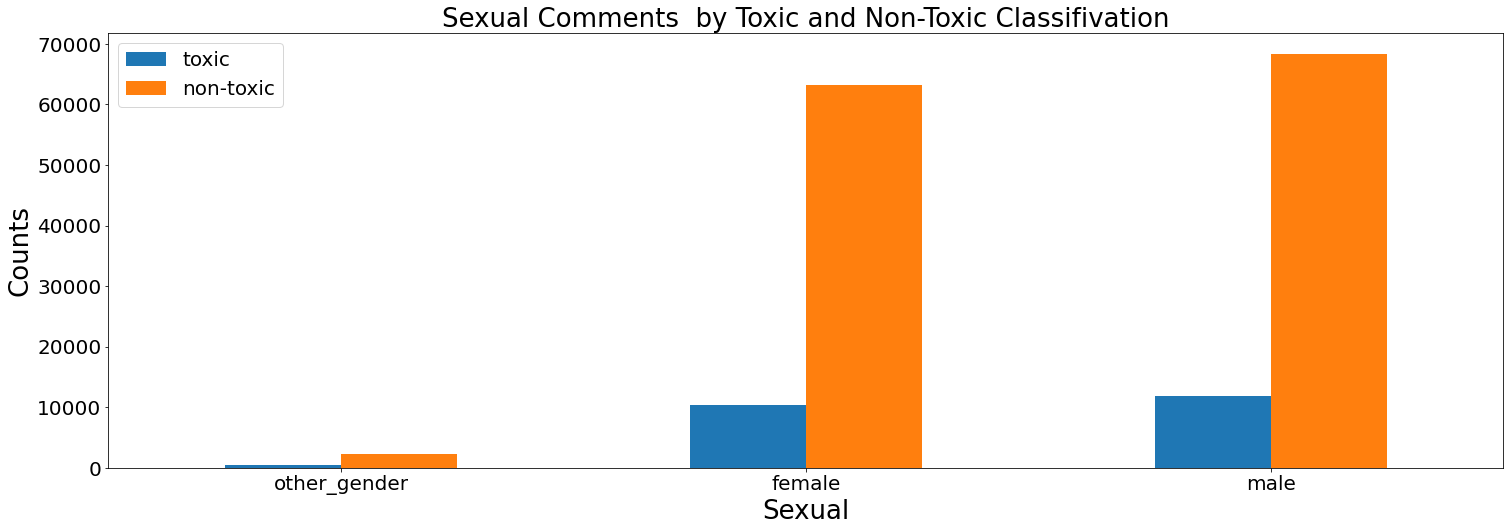

In [0]:
bar_plot(sexual,"Sexual Comments  by Toxic and Non-Toxic Classifivation",'Sexual')

**From Sexual category male feature contains more toxic comments followed by female feature**

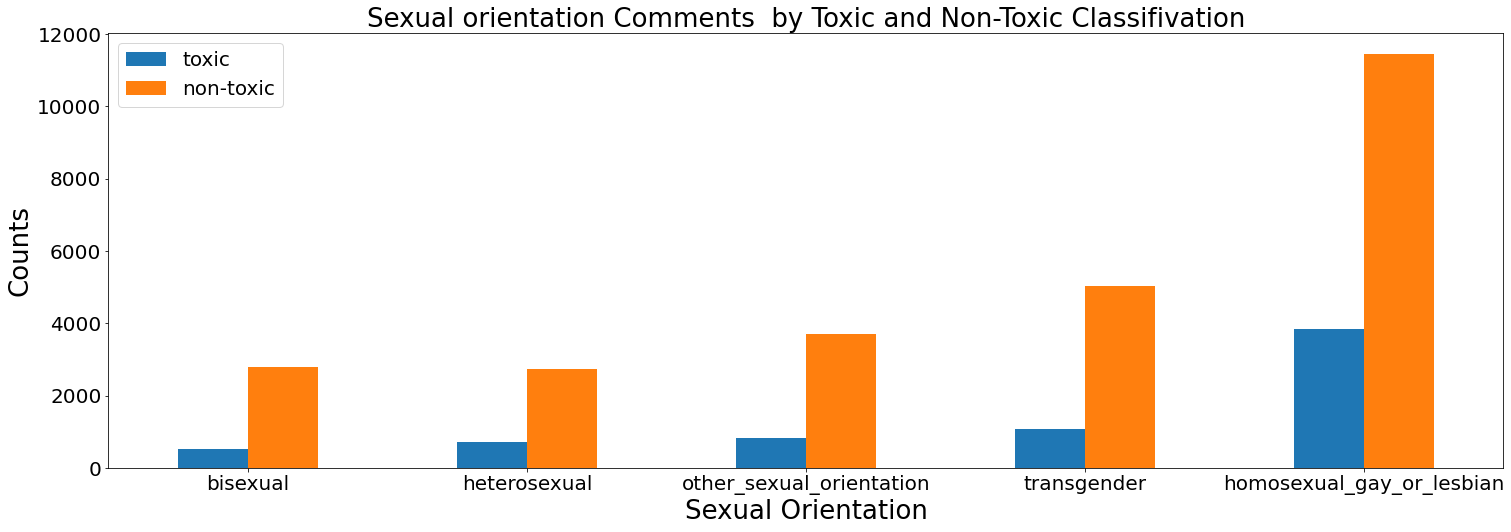

In [0]:
bar_plot(sexual_orientation,"Sexual orientation Comments  by Toxic and Non-Toxic Classifivation",'Sexual Orientation')

**From sexual orientation category homosexual_gay_or_lesbian feature contains more toxic comments followed by transgender feature.**

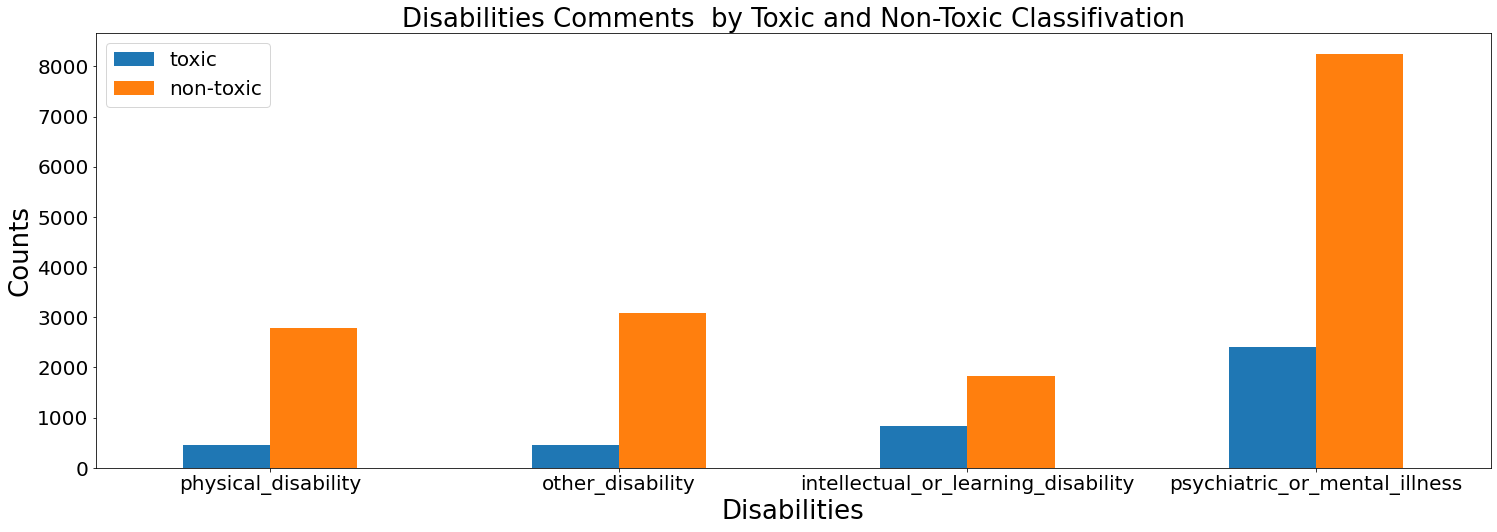

In [0]:
bar_plot(disabilities,"Disabilities Comments  by Toxic and Non-Toxic Classifivation",'Disabilities')

**From Disabilities category psychiatric_or_mental_illness feature contains more toxic comments followed by intellectual_or_learning_disability feature.**

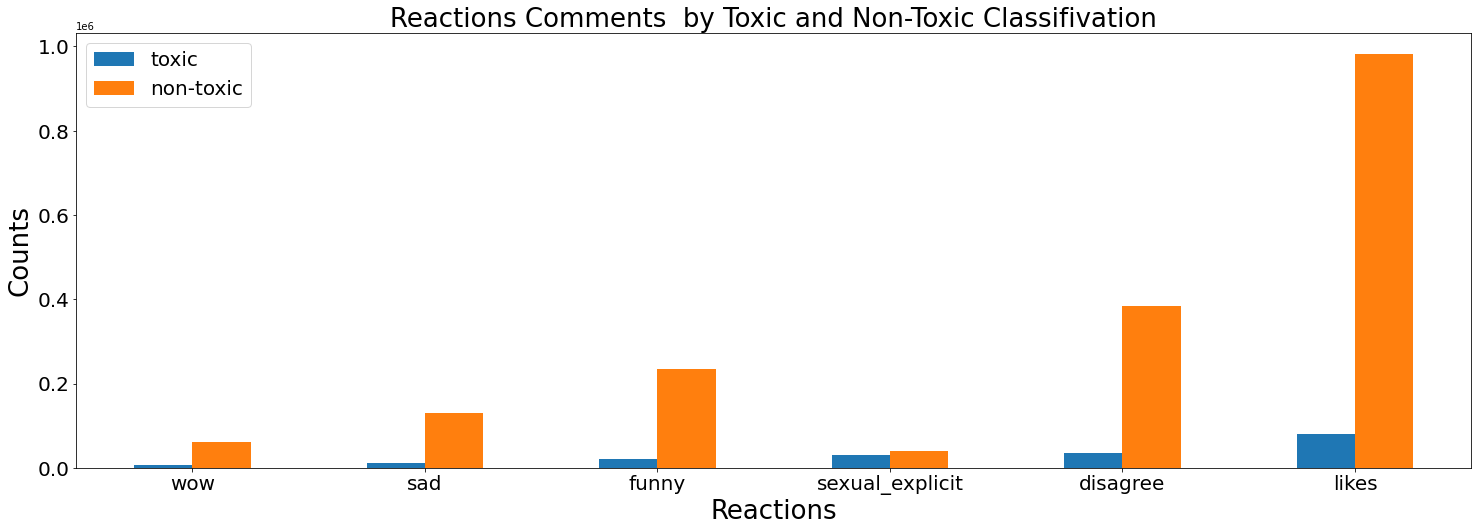

In [0]:
bar_plot(reactions,"Reactions Comments  by Toxic and Non-Toxic Classifivation",'Reactions')

**From Reactions category likes feature contains more toxic comments followed by disagree feature and funny fetures**

# Rating distribution

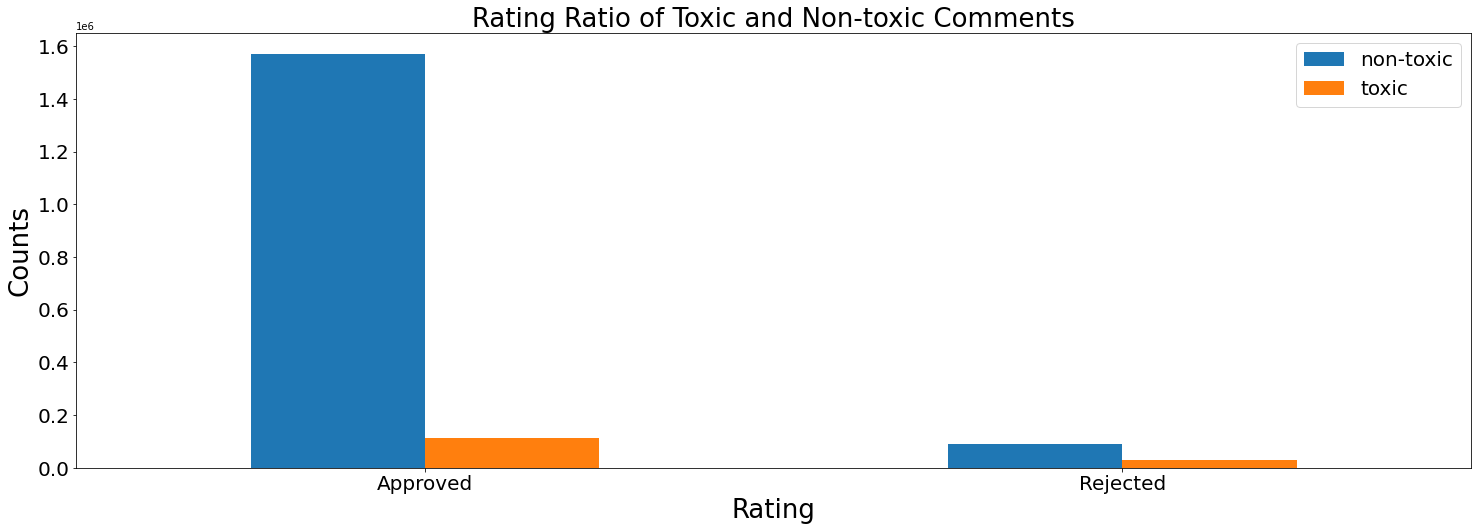

In [0]:
def bar_plot(features,title,xlabell):
  '''this function seperate toxic and non-toxic data from rating feature'''
  train_labeled_df = train.loc[:, ['target'] + features].dropna()
  toxic_df = train_labeled_df[train_labeled_df['target'] >= .5][features]
  non_toxic_df = train_labeled_df[train_labeled_df['target'] < .5][features]

  counts=toxic_df['rating'].value_counts()
  counts1=non_toxic_df['rating'].value_counts()
  df=pd.DataFrame([["Approved",counts1[0],counts[0]],["Rejected",counts1[1],counts[1]]],columns=['comment', 'non-toxic', 'toxic'])
  # here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
  df.plot(kind='bar', stacked=False, figsize=(25,8), fontsize=20).legend(prop={'size': 20})
  plt.title(title, fontsize=26)
  plt.ylabel('Counts', fontsize=26)
  plt.xlabel(xlabell, fontsize=26)
  plt.xticks([0,1],['Approved','Rejected'],rotation=0) 
bar_plot(['rating'],'Rating Ratio of Toxic and Non-toxic Comments','Rating')

**In Rating feature, approved category contains more toxic comments than rejected category**

From above plots we saw toxic comments are more in white,black,muslim,cristian,male,female,homosexual_gay_or_lesbian,
psychiatric_or_mental_illness
likes  fetures so lets look into wordcloud  of these features to know which words are toxic and non-toxic in between them.

# **Word Cloud**
Let's show the wordcloud of frequent used words in the comments.

In [0]:
#https://www.kaggle.com/ekhtiar/unintended-eda-with-tutorial-notes

def generate_word_cloud(identity, toxic_comments, non_toxic_comments):
  '''this simple function is used  to generate the wordcloud per identity group'''
    # convert stop words to sets as required by the wordcloud library
    stop_words = set(stopwords.words("english"))
    # create toxic wordcloud
    wordcloud_toxic = WordCloud(max_font_size=100, max_words=100, background_color="black", stopwords=stop_words).generate(str(toxic_comments))
    # create non-toxic wordcloud
    wordcloud_non_toxic = WordCloud(max_font_size=100, max_words=100, background_color="black", stopwords=stop_words).generate(str(non_toxic_comments))
    # draw the two wordclouds side by side using subplot
    fig = plt.figure(figsize=[15,5])
    fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=26)
    plt.imshow(wordcloud_toxic, interpolation="bilinear")
    plt.axis("off")
    fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=26)
    plt.imshow(wordcloud_non_toxic, interpolation="bilinear")
    plt.axis("off")
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Word Cloud - {} Feature'.format(identity), size = 26)
    plt.show()

### Lets start with white feature.

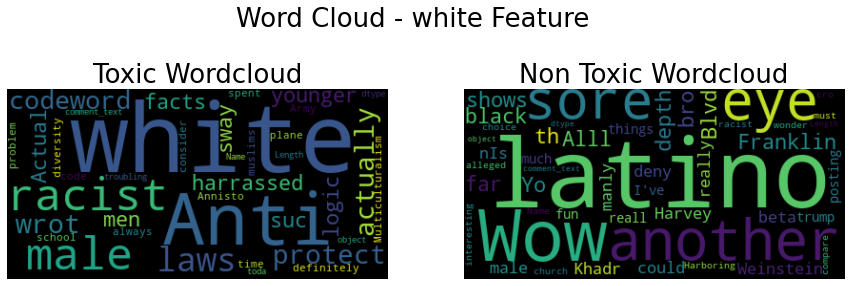

In [0]:
generate_word_cloud('white', train.loc[train['white'] > 0.5]['comment_text'].sample(20000), train.loc[train['white'] < 0.5]['comment_text'].sample(20000))

White feature:
- **In Toxic comments ,more frequent words are racist,Anti,male,white.**
- **In Non-toxic comments ,more frequent words are sore,latino,wow,another,eye.**

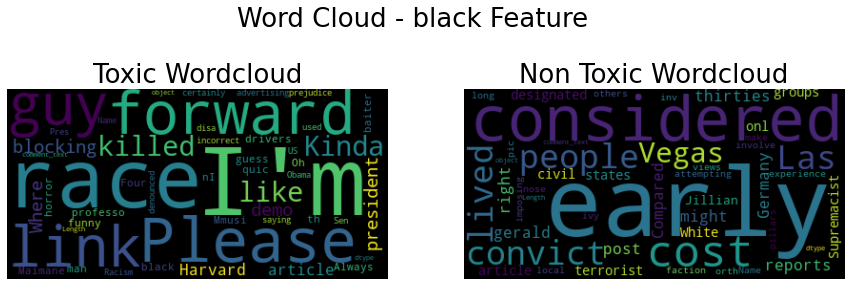

In [0]:
generate_word_cloud('black', train.loc[train['black'] > 0.5]['comment_text'].sample(10000), train.loc[train['black'] < 0.5]['comment_text'].sample(10000))

Black feature:
- **In Toxic comments ,more frequent words are race,forward,please,link.**
- **In Non-toxic comments ,more frequent words are considered,early,cost,vegas,convict.**

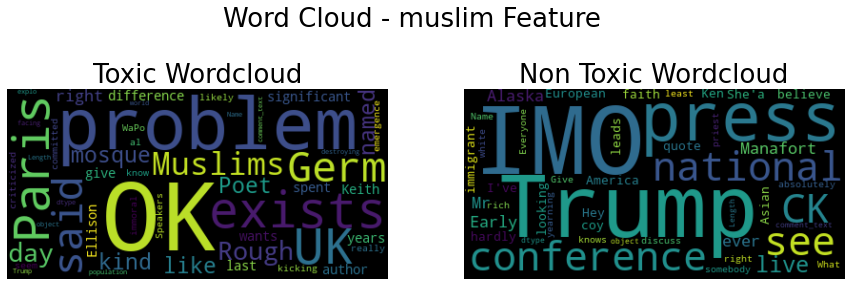

In [0]:
generate_word_cloud('muslim', train.loc[train['muslim'] > 0.5]['comment_text'].sample(10000), train.loc[train['muslim'] < 0.5]['comment_text'].sample(10000))

muslim feature:
- **In Toxic comments ,more frequent words are problem,ok,muslim,exists,paris,said,uk.**
- **In Non-toxic comments ,more frequent words are Trump,IMO,press,national,see,ck.**

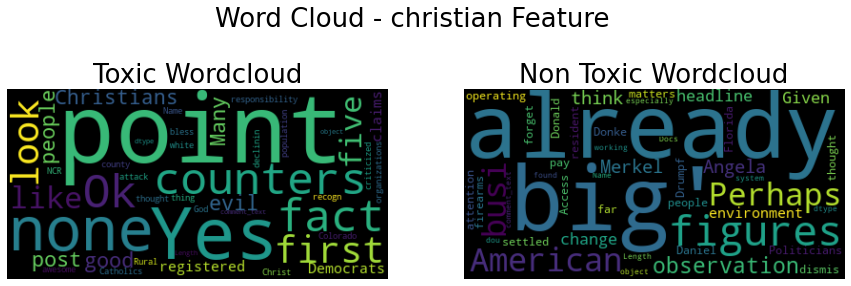

In [0]:
generate_word_cloud('christian', train.loc[train['christian'] > 0.5]['comment_text'].sample(10000), train.loc[train['christian'] < 0.5]['comment_text'].sample(10000))

Christian feature:
- **In Toxic comments ,more frequent words are point,yes,none,counters,fact,first,people.**
- **In Non-toxic comments ,more frequent words are already,big,observations,figures,perhaps.**

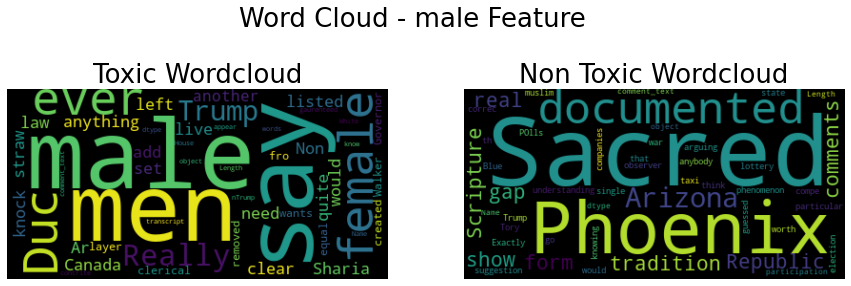

In [0]:
generate_word_cloud('male', train.loc[train['male'] > 0.5]['comment_text'].sample(10000), train.loc[train['male'] < 0.5]['comment_text'].sample(10000))

male feature:
- **In Toxic comments ,more frequent words are men,male,say,female,ever,duc.**
- **In Non-toxic comments ,more frequent words are sacred,phoenix,documented,arizona.**

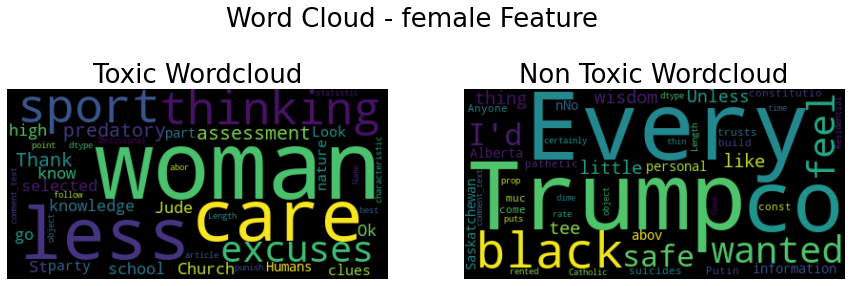

In [0]:
generate_word_cloud('female', train.loc[train['female'] > 0.5]['comment_text'].sample(10000), train.loc[train['female'] < 0.5]['comment_text'].sample(10000))

female feature:
- **In Toxic comments ,more frequent words are woman,care,less,sport,thinking,excuses,jude.**
- **In Non-toxic comments ,more frequent words are Every,Trump,black,wanted,safe.**

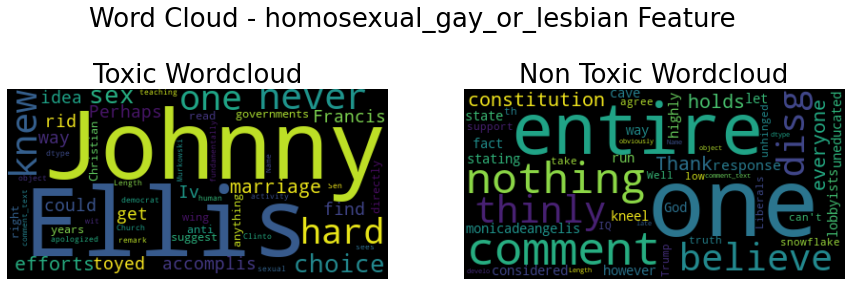

In [0]:
generate_word_cloud('homosexual_gay_or_lesbian', train.loc[train['homosexual_gay_or_lesbian'] > 0.5]['comment_text'].sample(10000), train.loc[train['homosexual_gay_or_lesbian'] < 0.5]['comment_text'].sample(10000))

homosexual_gay_or_lesbian feature:
- **In Toxic comments ,more frequent words are Ellis,Johnny,hard,choice,knew.**
- **In Non-toxic comments ,more frequent words are entire,nothing,comment,one,believe,constitution.**

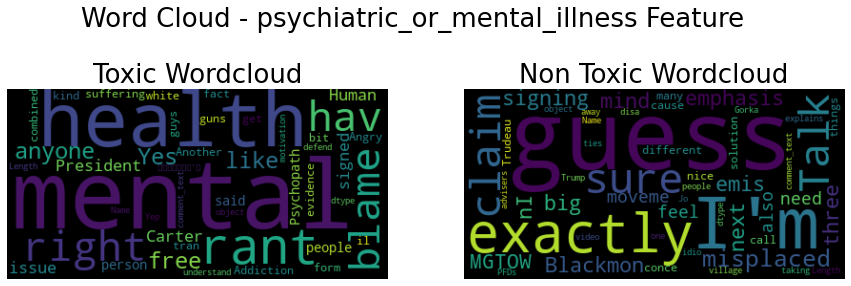

In [0]:
generate_word_cloud('psychiatric_or_mental_illness', train.loc[train['psychiatric_or_mental_illness'] > 0.5]['comment_text'].sample(2000), train.loc[train['psychiatric_or_mental_illness'] < 0.5]['comment_text'].sample(2000))

psychiatric_or_mental_illness feature:
- **In Toxic comments ,more frequent words are health,mental,free,blame,rant.**
- **In Non-toxic comments ,more frequent words are exactly,guess,sure,misplaced,claim.**

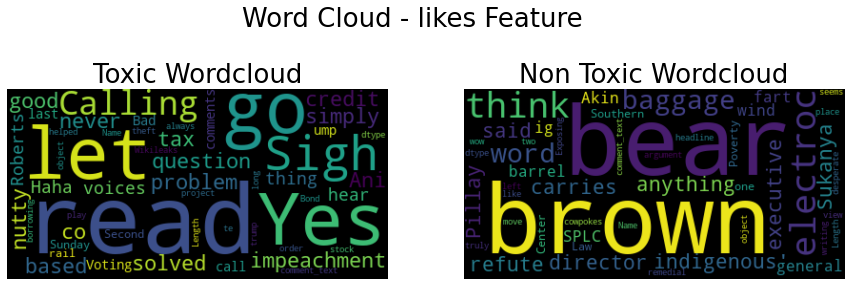

In [0]:
generate_word_cloud('likes', train.loc[train['likes'] > 0.5]['comment_text'].sample(9000), train.loc[train['likes'] < 0.5]['comment_text'].sample(9000))

likes feature:
- **In Toxic comments ,more frequent words are let,read,yes,go,sign,solved,calling.**
- **In Non-toxic comments ,more frequent words are bear,brown,think,electroc,anything.**

# Text Preprocessing
- Convert to lower case
- Clean contractions
- Clean special charactor
- Convert small caps

In [0]:
contraction_mapping = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": 
    "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
    "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
    "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
    "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
    "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
    "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "Trump's": "trump is", "Obama's": "obama is", "Canada's": "canada is", "today's": "today is"
}

In [0]:
#https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
stop_words = set(stopwords.words('english')) 
def clean_text(text):
  '''this for preprocessing text feature'''
  text=re.sub(r'http\S+', 'link', text)
  text = ' '.join(contraction_mapping[word] if word in contraction_mapping else word for word in text.split(" "))
  #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
  text = re.sub("\S*\d\S*", "", text).strip()
  text=emoji.demojize(text, delimiters=(" ", ""))
  text = re.sub('[^A-Za-z]+', ' ', text)
  text = ' '.join(e for e in text.split() if e not in stop_words)  
  if len(text)<2:
    text='unknown'
  return text.lower().strip()

In [0]:
train["clean_text"] = train["comment_text"].progress_apply(lambda text: clean_text(text))
test["clean_text"] = test["comment_text"].progress_apply(lambda text: clean_text(text))

In [0]:
#pickle.dump( train , open( "/content/drive/My Drive/jigsaw/trpreprocessed", "wb" ))
#pickle.dump( test, open( "/content/drive/My Drive/jigsaw/tepreprocessed", "wb" ))  
train_processed=pickle.load(open( "/content/drive/My Drive/jigsaw/trpreprocessed", "rb" ))
test_processed=pickle.load(open( "/content/drive/My Drive/jigsaw/tepreprocessed", "rb" ))  

# Feature Engineering

In [0]:
#is to add word count of comment data 
train_processed['comment_word_count'] = train_processed.clean_text.apply(lambda x: len(x.split()))
test_processed['comment_word_count'] = test_processed.clean_text.apply(lambda x: len(x.split()))

#is to add word count of comment data 
train_processed['comment_char_count'] = train_processed.clean_text.apply(lambda x: len(x))
test_processed['comment_char_count'] = test_processed.clean_text.apply(lambda x: len(x))

#  Univariate Analysis: comment_word_count  and comment_char_count features


Text(0.5, 0, 'Number of characters in comments')

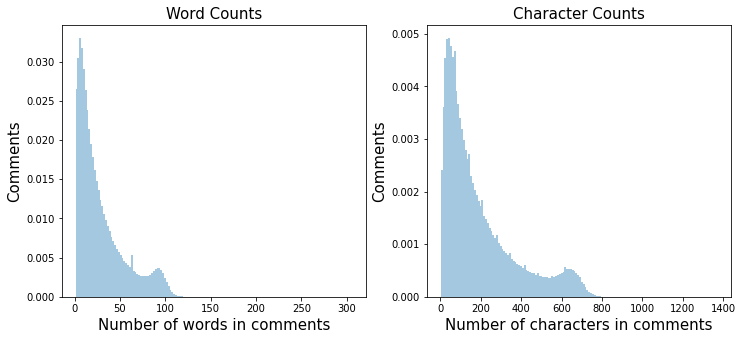

In [0]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a 
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1).set_title("Word Counts", fontsize=15)
sns.distplot(train_processed['comment_word_count'], kde=False, bins=150, label='Train word count', norm_hist=True)
plt.ylabel('Comments', fontsize=15) 
plt.xlabel('Number of words in comments', fontsize=15) 

plt.subplot(1, 2, 2).set_title("Character Counts", fontsize=15)
sns.distplot(train_processed['comment_char_count'], kde=False, bins=150, label='Train char count', norm_hist=True)
plt.ylabel('Comments', fontsize=15) 
plt.xlabel('Number of characters in comments', fontsize=15)

**Observation :** 
We can see that most of the words have length starting from 1 to 120 and character length is between 2 to 800.

### Lets see real counts of both the features as follows

In [0]:
print("\n Maximum length of words :",train_processed['comment_word_count'].max() )
print("\n Minimum length of words :",train_processed['comment_word_count'].min() )
print("\n------------------------------------")
print("\n Maximum length of characters :",train_processed['comment_char_count'].max() )
print("\n Minimum length of characters :",train_processed['comment_char_count'].min() )


 Maximum length of words : 306

 Minimum length of words : 1

------------------------------------

 Maximum length of characters : 1372

 Minimum length of characters : 2


# Boxplot

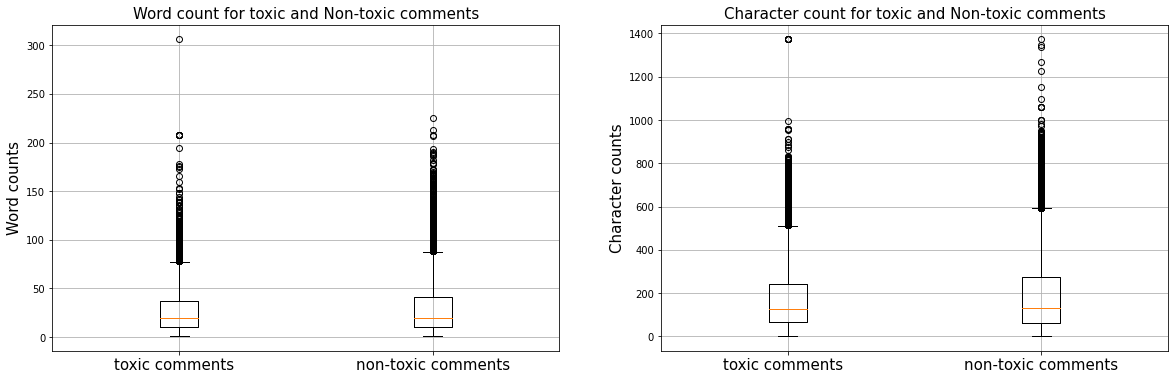

In [0]:
toxic_word_count1 = train_processed[train_processed['class']==1]['comment_word_count'].values
non_toxic_word_count1 = train_processed[train_processed['class']==0]['comment_word_count'].values

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
#getting boxplot based on word count of each class. 
plt.boxplot([toxic_word_count1, non_toxic_word_count1]) 
plt.xticks([1,2],('toxic comments  ','non-toxic comments'), fontsize=15) 
plt.ylabel('Word counts', fontsize=15) 
plt.title('Word count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 


toxic_char_count2 = train_processed[train_processed['class']==1]['comment_char_count'].values
non_toxic_char_count2 = train_processed[train_processed['class']==0]['comment_char_count'].values
plt.subplot(122)
plt.boxplot([toxic_char_count2, non_toxic_char_count2]) 
plt.xticks([1,2],('toxic comments  ','non-toxic comments'), fontsize=15) 
plt.ylabel('Character counts',fontsize=15) 
plt.title('Character count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 

**Observation**
- In first plot,Word counts of toxic and non toxic comments are overlapping.so we cant distinguish them further.
- In second plot, character counts are also overlapping but we can say that 75% of non-toxic comments are less than 280 characters.

### Lets see real picture of above plot

In [0]:
print("Toxic Word counts:")
print("\n Maximum length of words :",toxic_word_count1.max() )
print("\n Minimum length of words :",toxic_word_count1.min() )
print("------------------------------------")
print("Non-Toxic Word counts:")
print("\n Maximum length of characters :",non_toxic_word_count1.max() )
print("\n Minimum length of characters :",non_toxic_word_count1.min() )
print("=======================")
print("Toxic Char counts:")
print("\n Maximum length of words :",toxic_char_count2.max() )
print("\n Minimum length of words :",toxic_char_count2.min() )
print("------------------------------------")
print("Non-Toxic Char counts:")
print("\n Maximum length of characters :",non_toxic_char_count2.max() )
print("\n Minimum length of characters :",non_toxic_char_count2.min() )

Toxic Word counts:

 Maximum length of words : 306

 Minimum length of words : 1
------------------------------------
Non-Toxic Word counts:

 Maximum length of characters : 225

 Minimum length of characters : 1
Toxic Char counts:

 Maximum length of words : 1372

 Minimum length of words : 2
------------------------------------
Non-Toxic Char counts:

 Maximum length of characters : 1372

 Minimum length of characters : 2


# Violin Plot

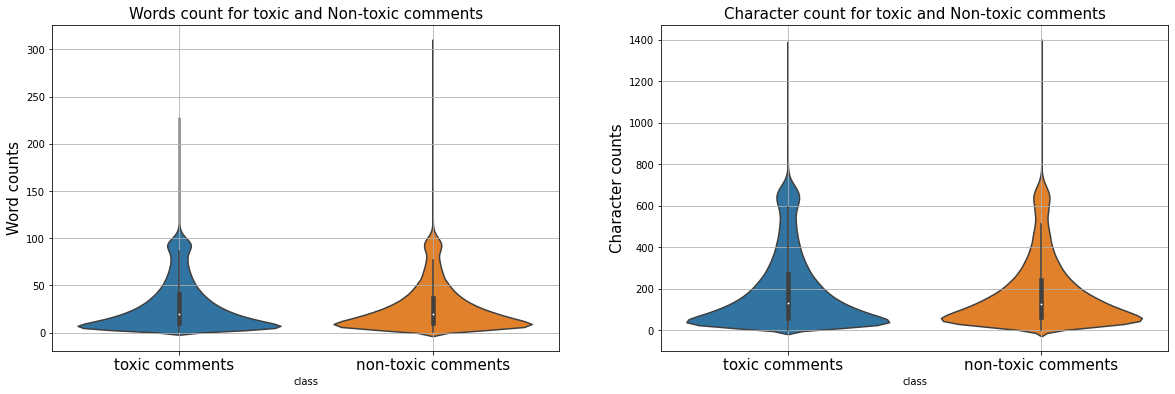

In [0]:
#getting violin plot on train data with comment_word_countfeature

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.violinplot(x = 'class', y = 'comment_word_count', data = train_processed[0:])
plt.xticks([0,1],('toxic comments  ','non-toxic comments'), fontsize=15) 
plt.ylabel('Word counts', fontsize=15) 
plt.title('Words count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 

plt.subplot(1,2,2)
sns.violinplot(x = 'class', y = 'comment_char_count', data = train_processed[0:])
plt.xticks([0,1],('toxic comments  ','non-toxic comments'), fontsize=15) 
plt.ylabel('Character counts',fontsize=15) 
plt.title('Character count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 

**Observation**
- This plot giving more clear picture than box plot which says that word count distribution is very peaked at count 10 and character count distribution is peaked at count 50.
- It means there are more comments with nearly 10 words and 50 characters.
- Distributions of toxic and non-toxic comments are almost same.

# Kernel Density Estimate Plot

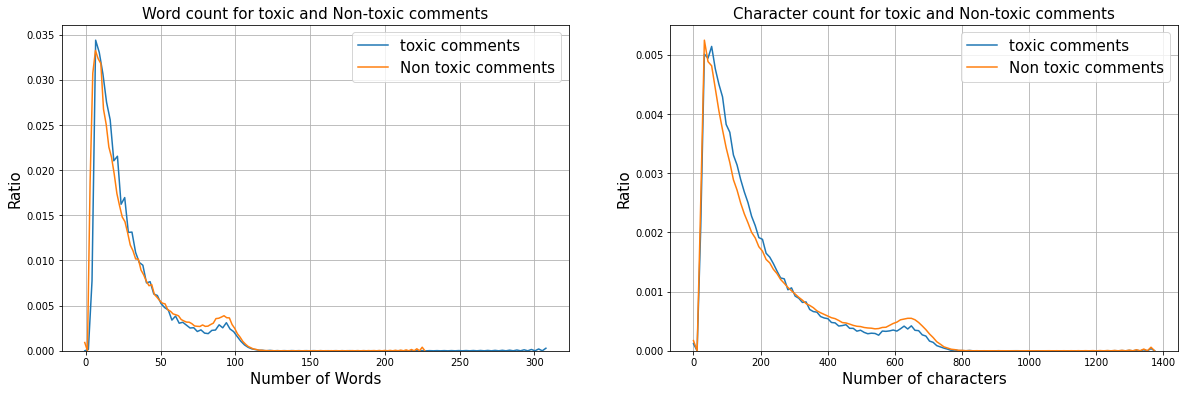

In [0]:
toxic_word_count1 = train_processed[train_processed['class']==1]['comment_word_count'].values
non_toxic_word_count1 = train_processed[train_processed['class']==0]['comment_word_count'].values

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.kdeplot(toxic_word_count1,label="toxic comments", bw=0.6) 
sns.kdeplot(non_toxic_word_count1,label="Non toxic comments", bw=0.6) 
plt.legend(fontsize=15) 
plt.xlabel('Number of Words', fontsize=15) 
plt.ylabel('Ratio', fontsize=15) 
plt.title('Word count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 


toxic_char_count2 = train_processed[train_processed['class']==1]['comment_char_count'].values
non_toxic_char_count2 = train_processed[train_processed['class']==0]['comment_char_count'].values
plt.subplot(122)
sns.kdeplot(toxic_char_count2,label="toxic comments", bw=0.6) 
sns.kdeplot(non_toxic_char_count2,label="Non toxic comments", bw=0.6) 
plt.legend(fontsize=15) 
plt.xlabel('Number of characters', fontsize=15) 
plt.ylabel('Ratio',fontsize=15) 
plt.title('Character count for toxic and Non-toxic comments', fontsize=15) 
plt.grid() 

**Observation**
- PDF of  both toxic and Non-toxic comments is overlapping,so its hard to distinguish results.           
- Vey high peek of both the pdf's has been seen near word count with 10 and character count 50.


# Visualization on train data 

In [0]:
dfp_subsampled = train[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['comment_word_count','comment_char_count']])
y = dfp_subsampled['class'].values

tsne2d = TSNE(
    n_components=2,
    perplexity=50,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.003408
[t-SNE] Computed conditional probabilities in 0.718s
[t-SNE] Iteration 50: error = 72.4004135, gradient norm = 0.0295096 (50 iterations in 1.603s)
[t-SNE] Iteration 100: error = 61.1872292, gradient norm = 0.0104540 (50 iterations in 1.280s)
[t-SNE] Iteration 150: error = 58.3941269, gradient norm = 0.0054704 (50 iterations in 1.233s)
[t-SNE] Iteration 200: error = 56.9852371, gradient norm = 0.0040134 (50 iterations in 1.199s)
[t-SNE] Iteration 250: error = 56.1403809, gradient norm = 0.003081

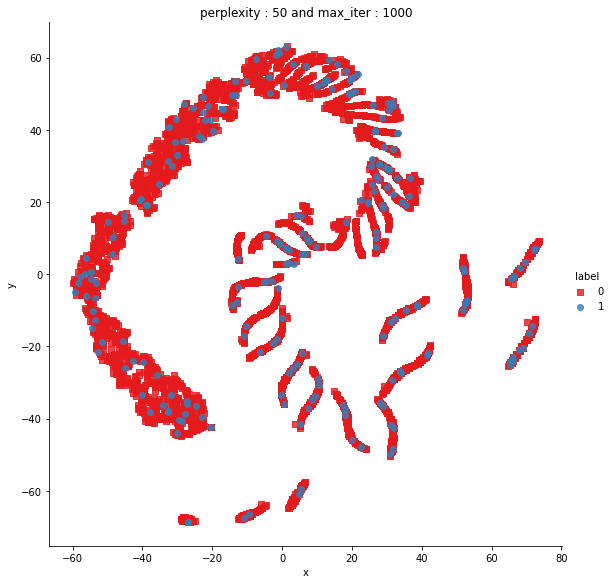

In [0]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(50, 1000))
plt.show()

**As we can see that non-toxic comments are somewhere seperated from toxic comments.**

# Train and Cv Split 

In [0]:
IDENTITY_COLUMNS = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 'white', 'psychiatric_or_mental_illness']
TARGET_COLUMN = 'target'
for column in IDENTITY_COLUMNS + [TARGET_COLUMN]:
    train_processed[column] = np.where(train_processed[column] >= 0.5, True, False)

Y = train_processed['class'].values
X_train, X_cv, Y_train, Y_cv = train_test_split(train_processed, Y,stratify=Y, test_size=0.2,random_state=42)
print("shape of train data :",X_train.shape,Y_train.shape)
print("shape of cv data : ",X_cv.shape,Y_cv.shape)

shape of train data : (1443899, 49) (1443899,)
shape of cv data :  (360975, 49) (360975,)


# Make Data Model Ready: Encoding numerical, text feature

# Encoding numerical feature: comment_word_count

In [0]:
normalizer = Normalizer()
normalizer.fit(X_train['comment_word_count'].values.reshape(1,-1))
X_train_word_count_norm = (normalizer.transform(X_train['comment_word_count'].values.reshape(1,-1))).transpose() 
X_cv_word_count_norm = (normalizer.transform(X_cv['comment_word_count'].values.reshape(1,-1))).transpose()
test_word_count_norm = (normalizer.transform(test_processed['comment_word_count'].values.reshape(1,-1))).transpose()
print("After vectorizations") 
print(X_train_word_count_norm.shape, Y_train.shape) 
print(X_cv_word_count_norm.shape, Y_cv.shape)
print(test_word_count_norm.shape)
print("="*100)

After vectorizations
(1443899, 1) (1443899,)
(360975, 1) (360975,)
(97320, 1)


# Encoding numerical feature: comment_char_count


In [0]:
normalizer = Normalizer()
normalizer.fit(X_train['comment_char_count'].values.reshape(1,-1))
X_train_char_count_norm = (normalizer.transform(X_train['comment_char_count'].values.reshape(1,-1))).transpose() 
X_cv_char_count_norm = (normalizer.transform(X_cv['comment_char_count'].values.reshape(1,-1))).transpose()
test_char_count_norm = (normalizer.transform(test_processed['comment_char_count'].values.reshape(1,-1))).transpose()
print("After vectorizations") 
print(X_train_char_count_norm.shape, Y_train.shape) 
print(X_cv_char_count_norm.shape, Y_cv.shape)
print(test_char_count_norm.shape)
print("="*100)

After vectorizations
(1443899, 1) (1443899,)
(360975, 1) (360975,)
(97320, 1)


# Encoding text feature: comment_text
- I have tried below approches by training model and checked model score but max_features=76918 worked well.
- type1=fidfVectorizer(ngram_range=(1,1),min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,smooth_idf=1, sublinear_tf=1) 
- type2=fidfVectorizer(ngram_range=(1,2),min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,smooth_idf=1, sublinear_tf=1) 
- type 3: TfidfVectorizer(ngram_range=(1,2),max_features=1500000)
- type 4: TfidfVectorizer(ngram_range=(1,2),max_features=150000)
- type 5: TfidfVectorizer(ngram_range=(1,1))
- type 6:TfidfVectorizer(max_features=50000)
-  type 7: TfidfVectorizer(max_features=23075)
- type 8: TfidfVectorizer(max_features=76918)
- type 9:TfidfVectorizer(max_features=115377)

In [0]:
vectorizer =  TfidfVectorizer(max_features=76918)
vectorizer.fit(X_train['clean_text'].values) 
X_train_comment_tfidf = vectorizer.transform(X_train['clean_text'].values) 
X_cv_comment_tfidf = vectorizer.transform(X_cv['clean_text'].values) 
test_comment_tfidf = vectorizer.transform(test_processed['clean_text'].values)

In [0]:
from scipy.sparse import hstack 
#concatenate numerical and categorical features 
x_tr = hstack((X_train_word_count_norm,X_train_char_count_norm,X_train_comment_tfidf)).tocsr()
x_cv = hstack((X_cv_word_count_norm,X_cv_char_count_norm,X_cv_comment_tfidf)).tocsr()
x_te = hstack(( test_word_count_norm,test_char_count_norm ,test_comment_tfidf)).tocsr()

# Machine Learning Models
### Metrics definition

In [0]:
#https://www.kaggle.com/dborkan/benchmark-kernel
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive
TOXICITY_COLUMN = 'target'

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[df[subgroup] & ~df[label]]
    non_subgroup_positive_examples = df[~df[subgroup] & df[label]]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[df[subgroup] & df[label]]
    non_subgroup_negative_examples = df[~df[subgroup] & ~df[label]]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': len(dataset[dataset[subgroup]])
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)


def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t


def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


def error_plot(alpha,auc_array_train,auc_array_cv):
  plt.plot(alpha, auc_array_train, label='Train AUC') 
  plt.plot(alpha, auc_array_cv, label='CV AUC')
  plt.scatter(alpha, auc_array_train, label='Train AUC points')
  plt.scatter(alpha, auc_array_cv, label='CV AUC points')
  plt.legend() 
  plt.xlabel("alpha: hyperparameter") 
  plt.ylabel("AUC") 
  plt.title("ERROR PLOTS") 
  plt.grid() 
  plt.show()


def roc_curve_plot(Y_train,y_train_pred,Y_cv,y_cv_pred):
  train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
  cv_fpr, cv_tpr, cv_thresholds = roc_curve(Y_cv, y_cv_pred)

  plt.title('Receiver Operating Characteristic Curve')
  plt.plot(train_fpr, train_tpr,'b', label="Train AUC =%0.2f" % auc(train_fpr, train_tpr))
  plt.plot(cv_fpr, cv_tpr,'r', label="Test AUC =%0.2f" % auc(cv_fpr, cv_tpr))

  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'g--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.grid()
  plt.show()

  print("="*100)
  best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
  plt.figure(figsize=(10,6))
  plt.title('Train confusion matrix', fontsize=15) 
  cf1=confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
  sn.heatmap(cf1, annot=True, fmt="d")
  
  cf2=confusion_matrix(Y_cv, predict_with_best_t(y_cv_pred, best_t))
  plt.figure(figsize = (10,6))
  plt.title('CV confusion matrix', fontsize=15) 
  sn.heatmap(cf2, annot=True,fmt="d")

# Machine Learning Model 1: Logistic Regression
##  Hyper parameter tuning

For values of alpha =  1e-07 The auc score on CV is: 0.9396586321126278
For values of alpha =  1e-06 The auc score on CV is: 0.9476303773747572
For values of alpha =  1e-05 The auc score on CV is: 0.9422021511049676
For values of alpha =  0.0001 The auc score on CV is: 0.9145650900568598


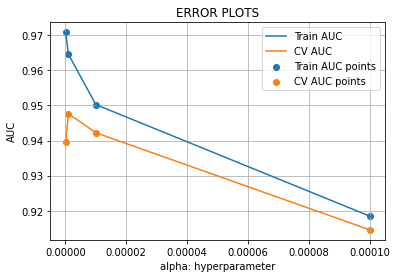

In [0]:
alpha = [10 ** x for x in range(-7, -3)]
auc_array_train=[]
auc_array_cv=[]
for i in alpha:
  clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
  clf.fit(x_tr, Y_train)

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(x_tr, Y_train)
    
  predict_y_train = sig_clf.predict_proba(x_tr)[:,1]
  predict_y_cv = sig_clf.predict_proba(x_cv)[:,1]

  auc_array_train.append(roc_auc_score(Y_train, predict_y_train))
  auc_array_cv.append(roc_auc_score(Y_cv, predict_y_cv))
  print('For values of alpha = ', i, "The auc score on CV is:",roc_auc_score(Y_cv, predict_y_cv))

error_plot(alpha,auc_array_train,auc_array_cv)

In [0]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
clf = SGDClassifier(alpha=0.000001, penalty='l2', loss='log', random_state=42,class_weight='balanced')
clf.fit(x_tr, Y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr, Y_train)

y_train_pred = sig_clf.predict_proba(x_tr)[:,1]
y_cv_pred = sig_clf.predict_proba(x_cv)[:,1]

# Firstly, we check how our model is performing using ROC curve 

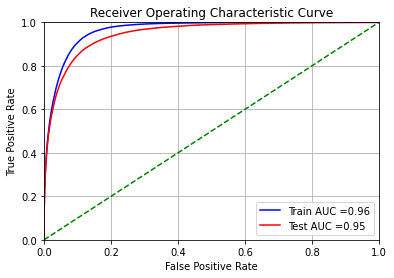

the maximum value of tpr*(1-fpr) 0.8212893609196633 for threshold 0.069


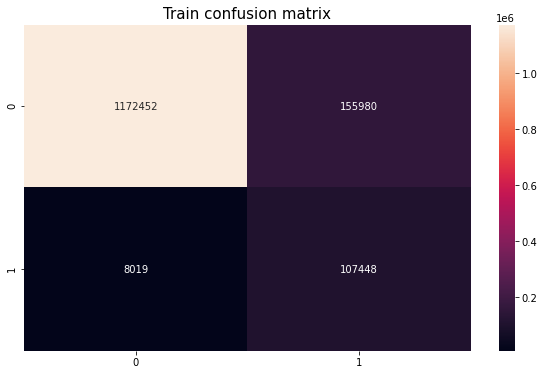

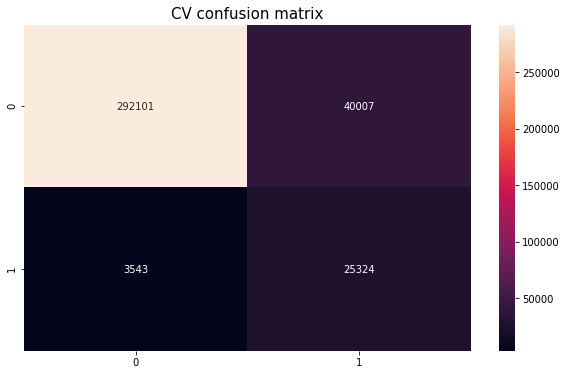

In [0]:
roc_curve_plot(Y_train,y_train_pred,Y_cv,y_cv_pred)

# Now we use custom metric designed in our kaggle competition as follows

In [0]:
MODEL_NAME = 'LR_model'
X_cv[MODEL_NAME] = y_cv_pred

In [0]:
X_cv.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,class,clean_text,comment_word_count,comment_char_count,LR_model
1538593,6005154,False,"So no O-line, no running game, no TE (or slot ...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-09-23 08:48:30.033417+00,102,5993576.0,380172,approved,0,0,0,0,0,0.0,0,4,0,so o line running game te slot receiver dt pla...,93,579,0.005054
495446,851365,False,Canuckistan,0.0,0.0,0.1,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-01-17 07:23:35.623467+00,54,850997.0,162291,approved,0,0,0,5,0,0.0,0,10,0,canuckistan,1,11,0.018818


In [0]:
bias_metrics_df = compute_bias_metrics_for_model(X_cv, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
2,homosexual_gay_or_lesbian,2163,0.782008,0.760467,0.962429
6,black,3079,0.787232,0.745137,0.967607
7,white,5018,0.817864,0.772038,0.967427
5,muslim,4209,0.823175,0.802359,0.962746
4,jewish,1512,0.851224,0.854121,0.951192
8,psychiatric_or_mental_illness,918,0.871861,0.836761,0.963380
0,male,8912,0.891339,0.877872,0.957811
1,female,10795,0.897445,0.890568,0.954890
3,christian,8163,0.899208,0.921535,0.934436


In [0]:
get_final_metric(bias_metrics_df, calculate_overall_auc(X_cv, MODEL_NAME))

0.8904733235626956

# Naive Bayes
### Hyper parameter tuning

For values of alpha =  0.01 The auc score on CV is: 0.8638602745525787
For values of alpha =  0.1 The auc score on CV is: 0.8775647543438234
For values of alpha =  1 The auc score on CV is: 0.8627768026044911


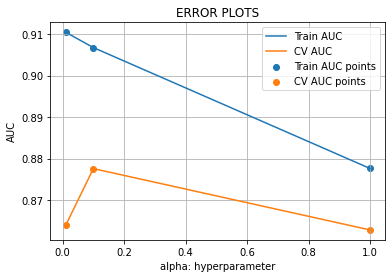

In [0]:
alpha = [10 ** x for x in range(-2, 1)]
auc_array_train=[]
auc_array_cv=[]
for i in alpha:
  clf = MultinomialNB(alpha=i) 
  clf.fit(x_tr, Y_train)

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(x_tr, Y_train)
    
  predict_y_train = sig_clf.predict_proba(x_tr)[:,1]
  predict_y_cv = sig_clf.predict_proba(x_cv)[:,1]

  auc_array_train.append(roc_auc_score(Y_train, predict_y_train))
  auc_array_cv.append(roc_auc_score(Y_cv, predict_y_cv))
  print('For values of alpha = ', i, "The auc score on CV is:",roc_auc_score(Y_cv, predict_y_cv))
error_plot(alpha,auc_array_train,auc_array_cv)

In [0]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
clf = MultinomialNB(alpha=0.1) 
clf.fit(x_tr, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr, Y_train)

y_train_pred = sig_clf.predict_proba(x_tr)[:,1]
y_cv_pred = sig_clf.predict_proba(x_cv)[:,1]


# ROC Curve

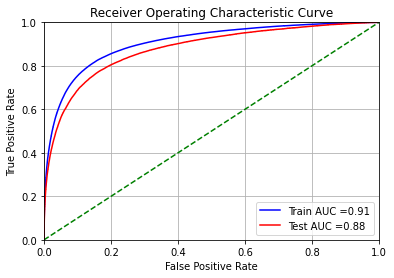

the maximum value of tpr*(1-fpr) 0.6943255401190821 for threshold 0.066


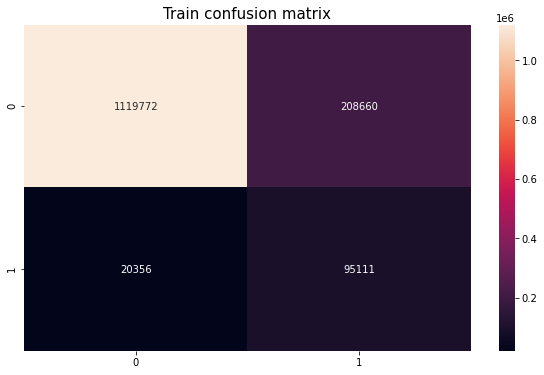

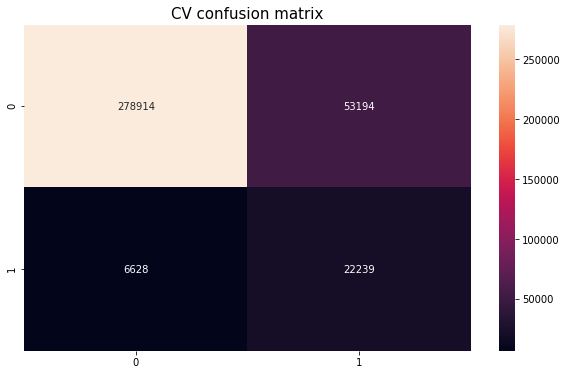

In [0]:
roc_curve_plot(Y_train,y_train_pred,Y_cv,y_cv_pred)

# Custom metric 

In [0]:
# Prediction on CV data
MODEL_NAME = 'NB_model'
X_cv[MODEL_NAME] = y_cv_pred

In [0]:
X_cv.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,class,clean_text,comment_word_count,comment_char_count,LR_model,NB_model
1538593,6005154,False,"So no O-line, no running game, no TE (or slot ...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-09-23 08:48:30.033417+00,102,5993576.0,380172,approved,0,0,0,0,0,0.0,0,4,0,so o line running game te slot receiver dt pla...,93,579,0.005054,0.017729
495446,851365,False,Canuckistan,0.0,0.0,0.1,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-01-17 07:23:35.623467+00,54,850997.0,162291,approved,0,0,0,5,0,0.0,0,10,0,canuckistan,1,11,0.018818,0.558113


In [0]:
bias_metrics_df = compute_bias_metrics_for_model(X_cv, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
2,homosexual_gay_or_lesbian,2163,0.770932,0.744431,0.904679
5,muslim,4209,0.771887,0.727883,0.917432
6,black,3079,0.776339,0.716623,0.921781
7,white,5018,0.785281,0.692370,0.936333
4,jewish,1512,0.804850,0.786438,0.894269
1,female,10795,0.844507,0.821241,0.899532
0,male,8912,0.846546,0.803253,0.913716
3,christian,8163,0.853535,0.891002,0.832497
8,psychiatric_or_mental_illness,918,0.862032,0.804329,0.921201


In [0]:
get_final_metric(bias_metrics_df, calculate_overall_auc(X_cv, MODEL_NAME))

0.837811746713348

# Linear Support Vector Machines


### Hyper paramter tuning

For values of alpha =  1e-07 The auc score on CV is: 0.9353775229814637
For values of alpha =  1e-06 The auc score on CV is: 0.9461685173473453
For values of alpha =  1e-05 The auc score on CV is: 0.9476579787160421
For values of alpha =  0.0001 The auc score on CV is: 0.9329576727848292


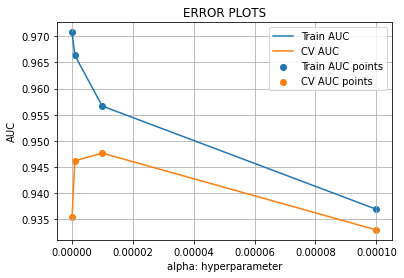

In [0]:
alpha = [10 ** x for x in range(-7, -3)]
auc_array_train=[]
auc_array_cv=[]
for i in alpha:
  clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=5,class_weight='balanced')
  clf.fit(x_tr, Y_train)
  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(x_tr, Y_train)
    
  predict_y_train = sig_clf.predict_proba(x_tr)[:,1]
  predict_y_cv = sig_clf.predict_proba(x_cv)[:,1]

  auc_array_train.append(roc_auc_score(Y_train, predict_y_train))
  auc_array_cv.append(roc_auc_score(Y_cv, predict_y_cv))
  print('For values of alpha = ', i, "The auc score on CV is:",roc_auc_score(Y_cv, predict_y_cv))

error_plot(alpha,auc_array_train,auc_array_cv)

In [0]:
clf = SGDClassifier(alpha=0.00001, penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(x_tr, Y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_tr, Y_train)

y_train_pred = sig_clf.predict_proba(x_tr)[:,1]
y_cv_pred = sig_clf.predict_proba(x_cv)[:,1]

# ROC Curve 

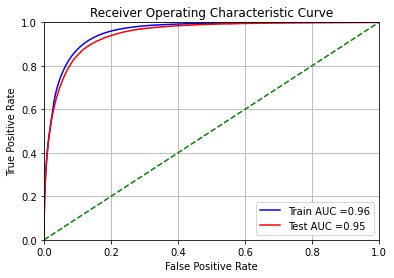

the maximum value of tpr*(1-fpr) 0.7955484326347957 for threshold 0.059


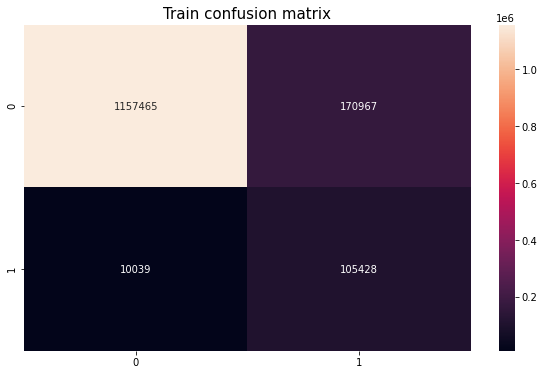

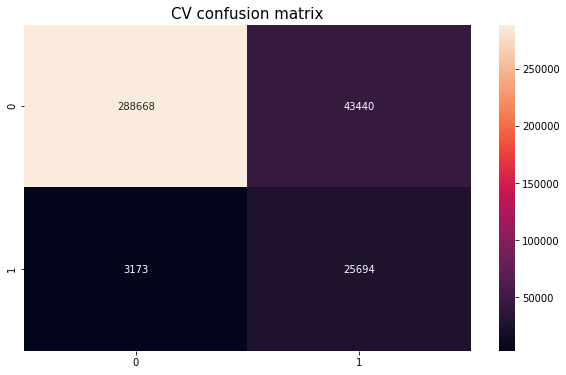

In [0]:
roc_curve_plot(Y_train,y_train_pred,Y_cv,y_cv_pred)

# Custom metric

In [0]:
# Prediction on CV data
MODEL_NAME = 'SVM_model'
X_cv[MODEL_NAME] = y_cv_pred

In [0]:
X_cv.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,class,clean_text,comment_word_count,comment_char_count,LR_model,NB_model,SVM_model
1538593,6005154,False,"So no O-line, no running game, no TE (or slot ...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-09-23 08:48:30.033417+00,102,5993576.0,380172,approved,0,0,0,0,0,0.0,0,4,0,so o line running game te slot receiver dt pla...,93,579,0.005054,0.017729,0.007126
495446,851365,False,Canuckistan,0.0,0.0,0.1,0.0,0.0,NaN,NaN,NaN,False,NaN,False,False,NaN,NaN,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2017-01-17 07:23:35.623467+00,54,850997.0,162291,approved,0,0,0,5,0,0.0,0,10,0,canuckistan,1,11,0.018818,0.558113,0.021644


In [0]:
bias_metrics_df = compute_bias_metrics_for_model(X_cv, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
6,black,3079,0.777690,0.690604,0.975239
2,homosexual_gay_or_lesbian,2163,0.783777,0.726070,0.969826
7,white,5018,0.810377,0.717118,0.975577
5,muslim,4209,0.815634,0.755065,0.971256
4,jewish,1512,0.846175,0.837240,0.956459
8,psychiatric_or_mental_illness,918,0.870516,0.812753,0.969329
0,male,8912,0.889711,0.870435,0.959899
1,female,10795,0.894940,0.885971,0.955470
3,christian,8163,0.898399,0.918577,0.936055


In [0]:
get_final_metric(bias_metrics_df, calculate_overall_auc(X_cv, MODEL_NAME))

0.8814130929571368